In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import json


filename = "transaction-data-adhoc-analysis.json"
rawpivot = pd.DataFrame(pd.read_json(filename))
rawpivot

#rawdata[rawdata["transaction_date"].str.contains("03/")]

#rawdata.sort_values(by='transaction_date', ascending=True, na_position='first')

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


# Table: Count per Month

In [2]:
# Table: Count per Month

rawdata = open(filename,"r+")
df = pd.DataFrame(json.load(rawdata))
   
month = {
        "01/":"JAN",
        "02/":"FEB",
        "03/":"MAR",
        "04/":"APR",
        "05/":"MAY",
        "06/":"JUN"
}

# for every month, itll look for the i in the transaction_date then we label that as the month

for i in month:
    df.loc[df["transaction_date"].str.contains(i),"month"] = month[i]

# function used so that 1): we can check it per month, 2): we can do a for i in the list of month at the end

def monthly_count(mon):
    
    # arranging by month, depending on which "mon" is in the df[mon]
    monthly = df[df.month==mon]
    sorted_df = monthly.sort_values(by=["transaction_date"])

    # item list to separate brands from products from quantities, SAMPLE: 
    # Exotic Extras,Beef Chicharon,(x3);HealthyKid 3+,Nutrional Milk,(x4);
    # INTO THIS:
    # Exotic Extras  Beef Chicharon    x3 
    # HealthyKid 3+  Nutritional Milk  x4
    item_list = []
    for index,row in sorted_df.iterrows():
        product_split = (row["transaction_items"].split(";"))
        for i in range(0,len(product_split)):
            item_list.append(product_split[i].split(","))
    
    
    item_df = pd.DataFrame(item_list,columns=["BRAND","PRODUCT","QUANTITY"])
    item_df["QUANTITY"] = item_df["QUANTITY"].str.extract('(\d+)',expand=False)
    item_df["QUANTITY"] = item_df["QUANTITY"].astype(int)

    itemcount = item_df.groupby("PRODUCT").sum()
   
    return itemcount.squeeze()

product_sale_count_df = pd.DataFrame({i:monthly_count(i) for i in list(month.values())})

product_sale_count_df
        

,JAN,FEB,MAR,APR,MAY,JUN
PRODUCT,,,,,,
Beef Chicharon,9665,10001,9816,9890,10028,9902
Gummy Vitamins,9681,9980,10145,9842,9948,9980
Gummy Worms,9559,9996,9986,10043,9801,9934
Kimchi and Seaweed,9676,9949,9967,9921,9773,10104
Nutrional Milk,9727,9691,9876,9786,9881,9767
Orange Beans,9774,10037,9611,9914,9964,10106
Yummy Vegetables,9959,10256,9896,9861,9735,9722


# Table: Total Sale Value per Item per Month

In [3]:
# Table: Total Sale Value per Item per Month

# for some reason, i couldn't separate them to make the code more readable: like so
    # all_salevaluedf = df[["transaction_items","transaction_value"]]
    # all_salevaluedf.drop_duplicates(subset=["transaction_items"])
# i actually couldn't understand why it didnt work, so i joined them together

all_salevaluedf = df[["transaction_items","transaction_value"]].drop_duplicates(subset=["transaction_items"])

unique_salevaluedf = pd.DataFrame(all_salevaluedf.loc[all_salevaluedf["transaction_items"].str.contains("x1") 
                                                      & (all_salevaluedf["transaction_items"].str.contains(";")== False)])

# concept: change the index of the column names, moving it to the appropriate column
def count_items_index(value):
    count_index = value[value.index(",")+1:value.index(",",value.index(",")+1)]
    return count_index

# applying index change
unique_salevaluedf["Product Name"] = unique_salevaluedf["transaction_items"].apply(count_items_index)

# getting cost of each item from respective product
cost = unique_salevaluedf.set_index("Product Name")["transaction_value"]

# labeling cost with respective name
total_revenue = pd.DataFrame({"Cost for each product":cost})

# for each i in  the total number of i's in the keys of product_sale_count_df, 
# we multiply the i'th value of the cost of the total revenue by the i'th value of the products_sale_count_df

for i in tuple(product_sale_count_df.keys()):
    total_revenue[i] = total_revenue["Cost for each product"] * product_sale_count_df[i]
    
total_revenue = total_revenue[["Cost for each product","JAN","FEB","MAR","APR","MAY","JUN"]]

total_revenue

,Cost for each product,JAN,FEB,MAR,APR,MAY,JUN
Product Name,,,,,,,
Yummy Vegetables,500,4979500,5128000,4948000,4930500,4867500,4861000
Gummy Worms,150,1433850,1499400,1497900,1506450,1470150,1490100
Beef Chicharon,1299,12554835,12991299,12750984,12847110,13026372,12862698
Kimchi and Seaweed,799,7731124,7949251,7963633,7926879,7808627,8073096
Orange Beans,199,1945026,1997363,1912589,1972886,1982836,2011094
Gummy Vitamins,1500,14521500,14970000,15217500,14763000,14922000,14970000
Nutrional Milk,1990,19356730,19285090,19653240,19474140,19663190,19436330


# Pie Chart for Monthly Sold Goods

In [4]:
# to show which one is in most demand for each month, so the next month's supplies 
# could be adjusted accordingly

#additional note while grading this part, this actually took me too long it took me so many stackoverflow articles and
#this article in particular: https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/

def pie_chart(mon):
    pie_items = ["Yummy Vegetables","Gummy Worms","Beef Chicharon","Kimchi and Seaweed","Orange Beans","Gummy Vitamins","Nutrional Milk",
                 ]
    pie_slices = [i for i in product_sale_count_df[mon]]
    colors = ["red","yellow","blue","cyan","magenta","orange","green"]
    plt.pie(pie_slices,labels=pie_items,colors=colors,startangle=90,shadow=True,explode = (0,0,0,0,0,0,0),
            radius = 1.2, autopct='%1.3f%%')
    plt.legend(bbox_to_anchor=(1,0.5), loc="center right", fontsize=9, 
           bbox_transform=plt.gcf().transFigure)
    plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
    plt.title("Monthly distribution of bought goods for: "+mon)
    plt.show()

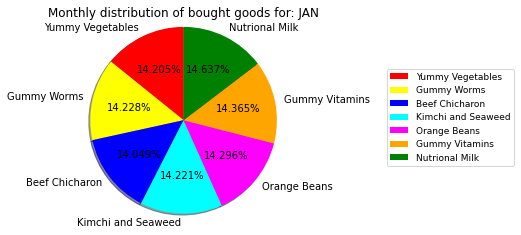

In [5]:
pie_chart("JAN")

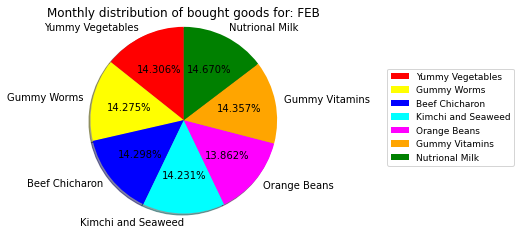

In [6]:
pie_chart("FEB")

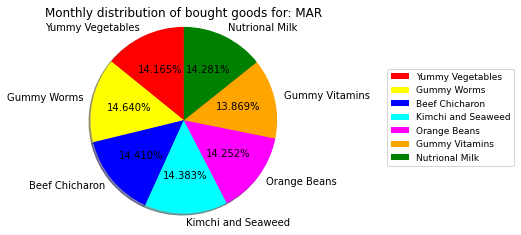

In [7]:
pie_chart("MAR")

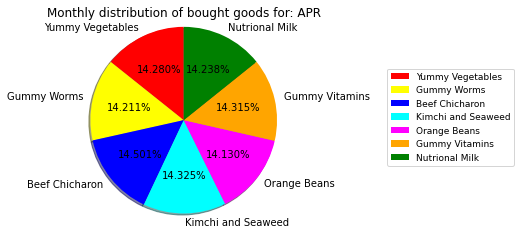

In [8]:
pie_chart("APR")

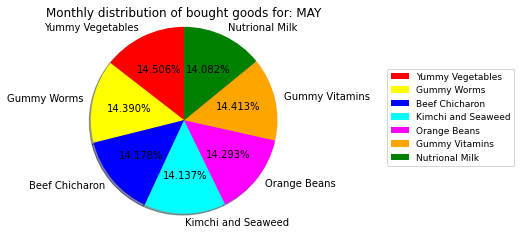

In [9]:
pie_chart("MAY")

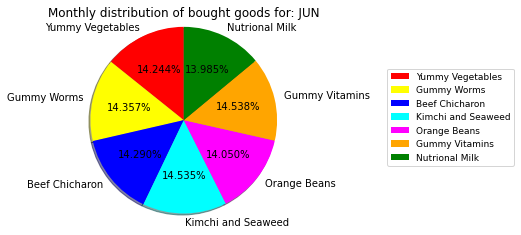

In [10]:
pie_chart("JUN")

# Repeaters

In [11]:
# Repeaters

def repeater(mon):
    month_l = ["JAN","FEB","MAR","APR","MAY","JUN"]
    month_index = month_l.index(mon)
    
    monthofinterest = df[df["month"]==month_l[month_index]]
    monthPrior_ofinterest = df[df["month"]==month_l[month_index-1]]
    
    MOI = set(monthofinterest["username"])
    MPOI = set(monthPrior_ofinterest["username"])
    return len(MOI & MPOI)

In [12]:
repeater("JAN")

5189

In [13]:
repeater("FEB")

5167

In [14]:
repeater("MAR")

5239

In [15]:
repeater("APR")

5191

In [16]:
repeater("MAY")

5126

In [17]:
repeater("JUN")

5208

# Inactives

In [29]:
# Inactives
month_l = ["JAN","FEB","MAR","APR","MAY","JUN"]

def inactive(mon):
    month_number = month_l.index(mon)+1
    january = set(df[df["month"].str.contains("JAN")]["name"])
    february = set(df[df["month"].str.contains("FEB")]["name"])
    march = set(df[df["month"].str.contains("MAR")]["name"])
    april = set(df[df["month"].str.contains("APR")]["name"])
    may = set(df[df["month"].str.contains("MAY")]["name"])
    june = set(df[df["month"].str.contains("JUN")]["name"])
    notjanuary = set(df[~df["month"].str.contains("JAN")]["name"])
    notfebruary = set(df[~df["month"].str.contains("FEB")]["name"])
    notmarch = set(df[~df["month"].str.contains("MAR")]["name"])
    notapril = set(df[~df["month"].str.contains("ARP")]["name"])
    notmay = set(df[~df["month"].str.contains("MAY")]["name"])
    notjune = set(df[~df["month"].str.contains("JUN")]["name"])

    conditions = set()
    if month_number == 1:
        pass
    elif month_number == 2:
        conditions = (january & notfebruary)
    elif month_number == 3:     
        conditions = (january & february & notmarch)
    elif month_number == 4:   
        conditions = (january & february & march & notapril)
    elif month_number == 5:   
        conditions = (january & february & march & april & notmay)
    elif month_number == 6:   
        conditions = (january & february & march & april & may & notjune)
    else:
        return len(conditions)
    return len(conditions)

In [30]:
inactive("JAN")

0

In [31]:
inactive("FEB")

6588

In [32]:
inactive("MAR")

5172

In [33]:
inactive("APR")

4126

In [34]:
inactive("MAY")

3289

In [35]:
inactive("JUN")

2667

# Engaged


In [41]:
#engaged: 

month_l = ["JAN","FEB","MAR","APR","MAY","JUN"]

def engaged(mon):
    month_number = month_l.index(mon)+1
    january = set(df[df["month"] == "JAN"]["name"])
    february = set(df[df["month"] == "FEB"]["name"])
    march = set(df[df["month"] == "MAR"]["name"])
    april = set(df[df["month"] == "APR"]["name"])
    may = set(df[df["month"] == "MAY"]["name"])
    june = set(df[df["month"] == "JUN"]["name"])

    conditions = set()
    if month_number == 1:
        conditions = january
    elif month_number == 2:   
        conditions = (january & february)
    elif month_number == 3:     
        conditions = (january & february & march)
    elif month_number == 4:   
        conditions = (january & february & march & april)
    elif month_number == 5:   
        conditions = (january & february & march & april & may)
    elif month_number == 6:   
        conditions = (january & february & march & april & may & june)
    else:
        pass
    if len(conditions) == 0:
        return (f"Not a valid month!")
    else:
        return len(conditions)

In [42]:
engaged("JAN")

6588

In [43]:
engaged("FEB")

5172

In [44]:
engaged("MAR")

4126

In [45]:
engaged("APR")

3289

In [46]:
engaged("MAY")

2667

In [47]:
engaged("JUN")

2190